# Study on relationship between Passenger Vehicle specifications and involvement in traffic incidents.
***
#### 'vehicles' data obtained from https://think.cs.vt.edu/corgis/csv/cars/cars.html and https://fueleconomy.gov
#### 'vehicles_incidents' data obtained from https://data.ny.gov/
***
#### By: Nomaan Ahmed
***

## Table of Contents

* [Data Wrangling](#data-wrangling)
    > - [Adding Origin Information to 'vehicles'](#adding-origins)
    
    > - [Cleaning 'vehicle_incidents' data](#cleaning-vehicle-incidents)
    
    > - [Entity Resolution in vehicle_incidents data](#entity-res-vehicle-incidents)
 
* [Answering Questions & Manipulating Data](#questions-manipulation)
    > - [Question #1: Were cars from a particular year more prone to incident involvement than others?](#question1)    
         >> - [Answer #1](#answer1)
    > - [Question #2: Is there a particular make that has more incidents than others?](#question2)
        >> - [Answer #2](#answer2)
    > - [Question #3: Is there a relationship between higher horsepower and contributing factor to incidents?](#question3)
        >> - [Answer #3](#answer3)
    > - [Question #4: Do certain countries tend to produce vehicles with more horsepower?](#question4)
        >> - [Answer #4](#answer4)
    > - [Question #5: How does country of origin impact vehicles' involvement in traffic incidents?](#question5)
        >> - [Answer #5](#answer5)

* [The End](#end)

## Data Wrangling <a name="data-wrangling"></a>

***

In [1]:
import pandas as pd
vehicles = pd.read_csv("data/vehicles.csv")
vehicle_incidents = pd.read_csv("data/vehicle_incidents.csv")

In [2]:
vehicles

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
0,18,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,Gasoline,140,25,250,False,2009 Audi A3 3.2,143,Audi,2009 Audi A3,6,236,6 Speed Automatic Select Shift,202,2009
1,22,Automatic transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T AT,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
2,21,Manual transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,30,200,False,2009 Audi A3 2.0 T,143,Audi,2009 Audi A3,6,207,6 Speed Manual,202,2009
3,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
4,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
5,16,Manual transmission,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,Gasoline,91,27,265,False,2009 Audi A5 3.2,17,Audi,2009 Audi A5,6,243,6 Speed Manual,62,2009
6,17,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,Gasoline,91,26,265,False,2009 Audi A5 3.2 AT,17,Audi,2009 Audi A5,6,243,6 Speed Automatic Select Shift,62,2009
7,13,Automatic transmission,All-wheel drive,Audi 4.2L 8 cylinder 350 hp 325 ft-lbs,Gasoline,201,18,350,False,2009 Audi Q7 4.2,221,Audi,2009 Audi Q7,6,325,6 Speed Automatic Select Shift,191,2009
8,14,Automatic transmission,All-wheel drive,Audi 3.6L 6 cylinder 280hp 266 ft-lbs,Gasoline,201,20,280,False,2009 Audi Q7 3.6,221,Audi,2009 Audi Q7,6,266,6 Speed Automatic Select Shift,191,2009
9,22,Manual transmission,All-wheel drive,Audi 2.0L 4 cylinder 211 hp 258 ft-lbs Turbo,Gasoline,147,30,211,False,2009 Audi A4 Sedan 2.0 T Quattro,96,Audi,2009 Audi A4 Sedan,6,258,6 Speed Manual,34,2009


In [3]:
vehicle_incidents

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2016,13364291,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,Not Entered,West,Gas,2012.0,NY,1.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,WMWZC3C57CWL81108
1,2016,13364304,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2014.0,NY,2.0,6.0,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,3GCUKREH8EG196335
2,2016,13364305,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2007.0,NY,1.0,4.0,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,1HGCM56387A220086
3,2016,13364307,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2011.0,NY,4.0,4.0,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,2CNFLCEC1B6362978
4,2016,13364306,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2004.0,NY,1.0,6.0,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",3G5DA03E04S597761
5,2016,13364313,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Parked,Not Entered,North,Gas,2014.0,NY,0.0,4.0,BMW,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,WBA3B5C51EP543896
6,2016,13364312,SUBURBAN,PASSENGER OR SUBURBAN,Entering Parked Position,Not Entered,North,Gas,2001.0,NY,NaN,4.0,HONDA,HUMAN,Driver Inattention/Distraction*,HUMAN,Not Applicable,Not Applicable,JHLRD18611C023039
7,2016,13364319,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Slowing or Stopping,Not Entered,West,Gas,2006.0,NY,1.0,6.0,HYUND,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,5NPEU46F76H086898
8,2016,13364318,PICKUP TRUCK,PASSENGER OR SUBURBAN,Slowing or Stopping,Not Entered,North,Gas,2008.0,NY,1.0,8.0,TOYOT,HUMAN,Unsafe Speed,HUMAN,Traffic Control Device Disregarded,Not Applicable,5TBBT54138S459332
9,2016,13364337,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,West,Gas,2004.0,NY,1.0,6.0,PONTI,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,2G2WP522741119566


#### As shown above, it appears that the 'vehicle_incidents' data doesn't have specific models of cars - only their makes and years. No problem, we can sort the 'vehicles' data by make and year to make the observations we want. Before that, let's remove any columns we don't need from the 'vehicles' dataset:

In [4]:
vehicles = vehicles.drop(['Height', 
               'Hybrid',
               'Length',
               'Number of Forward Gears',
               'Transmission',
               'Width'], axis=1)

#### Now to deal with the makes of the vehicles:

In [5]:
print('Total number of different car makes from the vehicles data =',(vehicles['Make'].nunique()),)
vehicles['Make'].unique()

Total number of different car makes from the vehicles data = 47


array(['Audi', 'Acura', 'BMW', 'Chevrolet', 'Nissan', 'Volvo', 'Bentley',
       'Toyota', 'Honda', 'Ford', 'Rolls-Royce', 'Volkswagen', 'Maybach',
       'Lamborghini', 'Lexus', 'Hyundai', 'Mercedes', 'BMW Motorrad',
       'Kia', 'AMG', 'Mazda', 'Mercedes-Benz', 'Mercedes-AMG',
       'Mitsubishi', 'Cadillac', 'Infiniti', 'Dodge', 'Lincoln', 'GMC',
       'Porsche', 'Jeep', 'Subaru', 'Buick', 'Suzuki', 'Saab',
       'Aston Martin', 'Grand Cherokee', 'Land Rover', 'Chrysler',
       'Ferrari', 'Scion', 'MINI', 'Jaguar', 'Chrysler Group LLC',
       'Lotus', 'Maserati', 'Mercury'], dtype=object)

### Adding Vehicle Origin Information <a id="adding-origins"></a>

#### We have 47 unique makes. Seeing as how the countries of origin are not listed, I will have to add them myself, meaning I have to add a new column stating their origins. Fortunately, I can make a dictionary of make : origin instead of running 47 different commands.

In [6]:
make_country = {
    'Audi':'Germany',
    'BMW' : 'Germany',
    'BMW Motorrad' : 'Germany',
    'Volkswagen' : 'Germany',
    'Mercedes' : 'Germany',
    'Mercedes-Benz' : 'Germany',
    'Mercedes-AMG' : 'Germany',
    'AMG' : 'Germany',
    'Maybach' : 'Germany',
    'Porsche':'Germany',
    'Acura': 'Japan',
    'Nissan' : 'Japan',
    'Toyota' : 'Japan',
    'Honda' : 'Japan',
    'Lexus' : 'Japan',
    'Mazda' : 'Japan',
    'Mitsubishi' : 'Japan',
    'Infiniti' : 'Japan',
    'Subaru' : 'Japan',
    'Suzuki' : 'Japan',
    'Scion' : 'Japan',
    'Chevrolet' : 'United States',
    'Ford' : 'United States',
    'Cadillac' : 'United States',
    'Dodge' : 'United States',
    'Lincoln' : 'United States',
    'GMC' : 'United States',
    'Jeep' : 'United States',
    'Buick' : 'United States',
    'Grand Cherokee' : 'United States',
    'Chrysler' : 'United States',
    'Chrysler Group LLC' : 'United States',
    'Mercury' : 'United States',
    'Volvo' : 'Sweden',
    'Saab' : 'Sweden',
    'Bentley' : 'United Kingdom',
    'Rolls-Royce' : 'United Kingdom',
    'Aston Martin' : 'United Kingdom',
    'Land Rover' : 'United Kingdom',
    'MINI' : 'United Kingdom',
    'Jaguar' : 'United Kingdom',
    'Lotus' : 'United Kingdom',
    'Lamborghini' : 'Italy',
    'Ferrari' : 'Italy',
    'Maserati' : 'Italy',
    'Hyundai' : 'Korea',
    'Kia' : 'Korea'    
}

def make_to_country(make):
    return make_country[make]

vehicles['Origin'] = vehicles['Make'].map(make_to_country)
vehicles

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Highway mpg,Horsepower,ID,Make,Model Year,Torque,Year,Origin
0,18,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,Gasoline,25,250,2009 Audi A3 3.2,Audi,2009 Audi A3,236,2009,Germany
1,22,Automatic transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,28,200,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,207,2009,Germany
2,21,Manual transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,30,200,2009 Audi A3 2.0 T,Audi,2009 Audi A3,207,2009,Germany
3,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,28,200,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,207,2009,Germany
4,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,28,200,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,207,2009,Germany
5,16,Manual transmission,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,Gasoline,27,265,2009 Audi A5 3.2,Audi,2009 Audi A5,243,2009,Germany
6,17,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,Gasoline,26,265,2009 Audi A5 3.2 AT,Audi,2009 Audi A5,243,2009,Germany
7,13,Automatic transmission,All-wheel drive,Audi 4.2L 8 cylinder 350 hp 325 ft-lbs,Gasoline,18,350,2009 Audi Q7 4.2,Audi,2009 Audi Q7,325,2009,Germany
8,14,Automatic transmission,All-wheel drive,Audi 3.6L 6 cylinder 280hp 266 ft-lbs,Gasoline,20,280,2009 Audi Q7 3.6,Audi,2009 Audi Q7,266,2009,Germany
9,22,Manual transmission,All-wheel drive,Audi 2.0L 4 cylinder 211 hp 258 ft-lbs Turbo,Gasoline,30,211,2009 Audi A4 Sedan 2.0 T Quattro,Audi,2009 Audi A4 Sedan,258,2009,Germany


#### There, now the vehicles data has countries of origin. Now to deal with the vehicles_incidents data.

***

### Cleaning 'vehicle_incidents' data <a id="cleaning-vehicle-incidents"></a>

In [7]:
vehicle_incidents

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2016,13364291,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,Not Entered,West,Gas,2012.0,NY,1.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,WMWZC3C57CWL81108
1,2016,13364304,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2014.0,NY,2.0,6.0,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,3GCUKREH8EG196335
2,2016,13364305,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2007.0,NY,1.0,4.0,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,1HGCM56387A220086
3,2016,13364307,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2011.0,NY,4.0,4.0,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,2CNFLCEC1B6362978
4,2016,13364306,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2004.0,NY,1.0,6.0,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",3G5DA03E04S597761
5,2016,13364313,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Parked,Not Entered,North,Gas,2014.0,NY,0.0,4.0,BMW,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,WBA3B5C51EP543896
6,2016,13364312,SUBURBAN,PASSENGER OR SUBURBAN,Entering Parked Position,Not Entered,North,Gas,2001.0,NY,NaN,4.0,HONDA,HUMAN,Driver Inattention/Distraction*,HUMAN,Not Applicable,Not Applicable,JHLRD18611C023039
7,2016,13364319,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Slowing or Stopping,Not Entered,West,Gas,2006.0,NY,1.0,6.0,HYUND,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,5NPEU46F76H086898
8,2016,13364318,PICKUP TRUCK,PASSENGER OR SUBURBAN,Slowing or Stopping,Not Entered,North,Gas,2008.0,NY,1.0,8.0,TOYOT,HUMAN,Unsafe Speed,HUMAN,Traffic Control Device Disregarded,Not Applicable,5TBBT54138S459332
9,2016,13364337,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,West,Gas,2004.0,NY,1.0,6.0,PONTI,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,2G2WP522741119566


#### First, let's get rid of columns we aren't interested in to reduce overhead and for clarity.

In [8]:
vehicle_incidents = vehicle_incidents.drop(['Case Vehicle ID', 
                        'Type / Axles of Truck or Bus', 
                        'Fuel Type', 
                        'State of Registration',
                        'Number of Occupants',
                        'Direction of Travel',
                        'Event Type',
                        'Partial VIN'], axis=1)

#### Next we need to remove any rows that don't have vehicle 'Make' information as they aren't very useful to our analysis:

In [9]:
vehicle_incidents = vehicle_incidents[vehicle_incidents['Vehicle Make'].notnull()]
vehicle_incidents

,Year,Vehicle Body Type,Registration Class,Action Prior to Accident,Vehicle Year,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description
0,2016,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,2012.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable
1,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,2014.0,6.0,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable
2,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2007.0,4.0,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable
3,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2011.0,4.0,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris
4,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2004.0,6.0,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable
5,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Parked,2014.0,4.0,BMW,HUMAN,Not Applicable,HUMAN,Not Applicable
6,2016,SUBURBAN,PASSENGER OR SUBURBAN,Entering Parked Position,2001.0,4.0,HONDA,HUMAN,Driver Inattention/Distraction*,HUMAN,Not Applicable
7,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Slowing or Stopping,2006.0,6.0,HYUND,HUMAN,Not Applicable,HUMAN,Not Applicable
8,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Slowing or Stopping,2008.0,8.0,TOYOT,HUMAN,Unsafe Speed,HUMAN,Traffic Control Device Disregarded
9,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2004.0,6.0,PONTI,HUMAN,Not Applicable,HUMAN,Not Applicable


#### I noticed that some of the makes listed were not of passenger vehicles, for example, entry 23:

In [10]:
vehicle_incidents.loc[23]

Year                                                            2015
Vehicle Body Type                                               DUMP
Registration Class                                AGRICULTURAL TRUCK
Action Prior to Accident                           Making Right Turn
Vehicle Year                                                    2005
Engine Cylinders                                                   6
Vehicle Make                                                    MACK
Contributing Factor 1                                          HUMAN
Contributing Factor 1 Description    Driver Inattention/Distraction*
Contributing Factor 2                                        VEHICLE
Contributing Factor 2 Description                  Oversized Vehicle
Name: 23, dtype: object

#### This is an agricultural/dump truck, and is not what we're interested in. Fortunately, the data states the Vehicle Body Type, so we can eliminate the ones that don't fit the Passenger Vehicle category, like 'DUMP', as seen above.

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(vehicle_incidents['Vehicle Body Type'].value_counts())


4 DOOR SEDAN                 625496
SUBURBAN                     496591
PICKUP TRUCK                  97927
2 DOOR SEDAN                  63986
VAN TRUCK                     25972
MOTORCYCLE                    13334
TRACTOR                       11957
CONVERTIBLE                   10563
BUS (OMNIBUS)                 10474
TAXI                           9000
DUMP                           8755
DELIVERY TRUCK                 4774
UTILITY                        3562
POLICE VEHICLE                 1731
FLAT BED TRUCK                 1465
TOW TRUCK                      1331
REFRIGERATOR TRUCK              961
TANK TRUCK                      933
UNKNOWN TRUCK                   922
SEDAN                           912
UNKNOWN VEHICLE                 891
STAKE TRUCK                     645
AMBULANCE                       545
OTHER VEHICLE                   408
HOUSE ON WHEELS                 404
TRACTION ENGINE                 363
FIRE VEHICLE                    343
CEMENT MIXER                

#### As seen above, we have a lot of different Vehicle Body Types. Its convenient that the large majority are Passenger Vehicles such as '4 DOOR SEDAN', ' 2 DOOR SEDAN', etc. which are what we want. By going through this list, we can simply eliminate any row that isn't part of the 'Passenger Vehicle' type designation that we decide on.

In [12]:
vehicle_incidents = vehicle_incidents[vehicle_incidents['Vehicle Body Type'].isin(['4 DOOR SEDAN',
    'SUBURBAN',
    'PICKUP TRUCK',
    '2 DOOR SEDAN',
    'CONVERTIBLE',
    'TAXI',
    'SEDAN',
    'LIMOUSINE (OMNIBUS)', ])]

vehicle_incidents

,Year,Vehicle Body Type,Registration Class,Action Prior to Accident,Vehicle Year,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description
0,2016,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,2012.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable
1,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,2014.0,6.0,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable
2,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2007.0,4.0,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable
3,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2011.0,4.0,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris
4,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2004.0,6.0,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable
5,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Parked,2014.0,4.0,BMW,HUMAN,Not Applicable,HUMAN,Not Applicable
6,2016,SUBURBAN,PASSENGER OR SUBURBAN,Entering Parked Position,2001.0,4.0,HONDA,HUMAN,Driver Inattention/Distraction*,HUMAN,Not Applicable
7,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Slowing or Stopping,2006.0,6.0,HYUND,HUMAN,Not Applicable,HUMAN,Not Applicable
8,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Slowing or Stopping,2008.0,8.0,TOYOT,HUMAN,Unsafe Speed,HUMAN,Traffic Control Device Disregarded
9,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2004.0,6.0,PONTI,HUMAN,Not Applicable,HUMAN,Not Applicable


#### While the data seems quite narrowed down, a data scientist's job is never done! One example of a bad entry is 1299:

In [13]:
vehicle_incidents.loc[1299]

Year                                                 2015
Vehicle Body Type                                SUBURBAN
Registration Class                              AMBULANCE
Action Prior to Accident             Going Straight Ahead
Vehicle Year                                         2010
Engine Cylinders                                        8
Vehicle Make                                         FORD
Contributing Factor 1                               HUMAN
Contributing Factor 1 Description          Not Applicable
Contributing Factor 2                               HUMAN
Contributing Factor 2 Description          Not Applicable
Name: 1299, dtype: object

#### We can narrow down the data even further by using the 'Registration Class' column. This states what the vehicle is registered as - so, as in the example above, an Ambulance would not be useful to us; it may be a Ford, but it is a heavily modified Ford driven by professionals, and so it does not represent a passenger vehicle. Eliminating any such registration classes will help narrow the data even further:

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(vehicle_incidents['Registration Class'].value_counts())


PASSENGER OR SUBURBAN               1117499
Not Entered                           70054
OMNIBUS - TAXI                        39489
SPECIAL PASSENGER                     20530
COMMERCIAL                            18031
AGRICULTURAL TRUCK                    14290
ORGANIZATIONAL                         5461
OMNIBUS - LIVERY                       4646
POLITICAL SUBDIVISION                  3656
OMNIBUS-SPECIAL (PRIVATE RENTAL)       2704
SPORTS                                 1515
SCHOOL CAR                             1168
REGIONAL                               1167
MEDICAL DOCTOR                         1147
AMBULANCE                               667
STATE                                   553
AGRICULTURAL COMMERCIAL                 390
ORGANIZATIONAL COMMERCIAL               328
HAM OPERATOR                            249
HISTORICAL                              178
VAS VOLUNTEER AMBULANCE                 148
OMNIBUS - REGULAR                       104
IN TRANSIT PERMIT               

#### Based on the list above, we can designate passenger vehicle registration classes that we're interested in, which will eliminate any rows that don't match.

In [15]:
vehicle_incidents = vehicle_incidents[vehicle_incidents['Registration Class'].isin(['PASSENGER OR SUBURBAN',
    'Not Entered',
    'OMNIBUS - TAXI',
    'SPECIAL PASSENGER',
    'COMMERCIAL',
    'ORGANIZATIONAL',
    'SPORTS',
    'REGIONAL',
    'STATE',
    'ORGANIZATIONAL COMMERCIAL',
    'DEALER' ])]

vehicle_incidents

,Year,Vehicle Body Type,Registration Class,Action Prior to Accident,Vehicle Year,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description
0,2016,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,2012.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable
1,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,2014.0,6.0,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable
2,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2007.0,4.0,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable
3,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2011.0,4.0,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris
4,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2004.0,6.0,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable
5,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Parked,2014.0,4.0,BMW,HUMAN,Not Applicable,HUMAN,Not Applicable
6,2016,SUBURBAN,PASSENGER OR SUBURBAN,Entering Parked Position,2001.0,4.0,HONDA,HUMAN,Driver Inattention/Distraction*,HUMAN,Not Applicable
7,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Slowing or Stopping,2006.0,6.0,HYUND,HUMAN,Not Applicable,HUMAN,Not Applicable
8,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Slowing or Stopping,2008.0,8.0,TOYOT,HUMAN,Unsafe Speed,HUMAN,Traffic Control Device Disregarded
9,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2004.0,6.0,PONTI,HUMAN,Not Applicable,HUMAN,Not Applicable


***

### Entity Resolution in 'vehicle_incidents' <a id="entity-res-vehicle-incidents"></a>

#### Finally, in vehicle_incidents, having the Vehicle Make is very useful, but unfortunately not all the names are uniform/properly listed (this can probably be attributed to law enforcement officers quickly entering information into their computers, typos and all!). See below:

In [16]:
makes_before = vehicle_incidents['Vehicle Make'].unique()
makes_before.sort()
print('Total number of different car makes from the vehicle_incidents data before entity resolution =',(len(makes_before)),)
makes_before

Total number of different car makes from the vehicle_incidents data before entity resolution = 501


array(['A', 'AAA', 'AARD', 'ABAR', 'ABTR', 'AC', 'ACCUR', 'ACME', 'ACRA',
       'ACUR', 'ACURA', 'ACURS', 'ACURU', 'ACUTA', 'AFTM', 'AL/RO',
       'ALFA', 'ALFAR', 'ALYT', 'AM/GE', 'AMC', 'AMER', 'AMERI', 'AMGN',
       'AMHA', 'ARBOC', 'AS/MA', 'ASTO', 'AU/HE', 'AUBU', 'AUCRA', 'AUDI',
       'AUROR', 'AUSTI', 'AVEN', 'AVTI', 'AZAL', 'BENT', 'BENTL', 'BENZ',
       'BLAB', 'BLUG', 'BMC', 'BMW', 'BMWNA', 'BMWV', 'BNW', 'BUBAR',
       'BUCC', 'BUCK', 'BUIC', 'BUICK', 'BUICL', 'BWM', 'BYD', 'C',
       'CADDI', 'CADE', 'CADF', 'CADI', 'CADIL', 'CAON', 'CARR', 'CENT',
       'CHAMP', 'CHCVR', 'CHECK', 'CHECR', 'CHERV', 'CHEV', 'CHEVE',
       'CHEVR', 'CHEVT', 'CHEVY', 'CHEX', 'CHRSL', 'CHRSY', 'CHRVR',
       'CHRY', 'CHRYL', 'CHRYS', 'CHVER', 'CHVL', 'CHYRS', 'CITRO',
       'CJEVR', 'CMBL', 'COBR', 'COOP', 'CORBE', 'CORV', 'CORVA', 'CRI',
       'CRYS', 'CSDIL', 'CUSTO', 'D', 'DACO', 'DAEW', 'DAEWO', 'DAIN',
       'DART', 'DATS', 'DATSU', 'DDOGE', 'DEER', 'DEFEN', 'DELTA',
       '

#### As an example, DODEG, DODGE, and DODG are all referring to Dodge. Time to perform some entity resolution and cleaning.
##### I tried to stick with the make categorization that is used in the vehicles data (so for example, 'Smart' will be put under 'Mercedes-Benz' rather than its own brand, since Smart is a child brand of Mercedes-Benz.)
##### Note that any that fall under 'N/A' is due to a) No match found/could not resolve. b) It was ambiguous, for example 'MERC' could be referring to Mercedes-Benz or Mercury. This was done to avoid skewing the data. c) It was not relevant (i.e. it was the brand of a trailer manufacturer)
##### In case you're wondering - yes, I did all of these manually. Unfortunately there wasn't any other feasible way to do this. Hopefully this will be useful to some future data scientist!

In [17]:
make_normalizing = {
    'A' : 'N/A', 'AAA' : 'N/A', 'AARD' : 'N/A', 'ABAR' : 'N/A', 'ABTR' : 'N/A', 'AC' : 'N/A', 'ACME' : 'N/A', 
        'AFTM' : 'N/A', 'ALYT' : 'N/A', 'AMHA' : 'N/A', 'ARBOC' : 'N/A', 'AU/HE' : 'N/A', 'AUBU' : 'N/A', 
        'AVEN' : 'N/A', 'AZAL' : 'N/A', 'BLAB' : 'N/A', 'BLUG' : 'N/A', 'BUBAR' : 'N/A', 'BUCC' : 'N/A', 
        'BYD' : 'N/A', 'C' : 'N/A', 'CADE' : 'N/A', 'CADF' : 'N/A', 'CAON' : 'N/A', 'CARR' : 'N/A', 'CENT' : 'N/A', 
        'CHAMP' : 'N/A', 'CHEX' : 'N/A', 'CMBL' : 'N/A', 'CORBE' : 'N/A', 'CRI' : 'N/A', 'CSDIL' : 'N/A', 'CUSTO' : 'N/A', 
        'D' : 'N/A', 'DACO' : 'N/A', 'DAIN' : 'N/A', 'DEER' : 'N/A', 'DIAMO' : 'N/A', 'DODD' : 'N/A', 'DOEP' : 'N/A',
        'DSWS' : 'N/A', 'ELKHA' : 'N/A', 'ELKRI' : 'N/A', 'EM' : 'N/A', 'ENVY' : 'N/A', 'EVAP' : 'N/A', 'EZGO' : 'N/A',
        'EZHA' : 'N/A', 'FHMC' : 'N/A', 'FLE' : 'N/A', 'FLEET' : 'N/A', 'FONA' : 'N/A', 'FOURW' : 'N/A', 'FRE' : 'N/A', 
        'FREE' : 'N/A', 'FRHT' : 'N/A', 'FROL' : 'N/A', 'FRT' : 'N/A', 'GLEC' : 'N/A', 'GLEH' : 'N/A', 'GO/CO' : 'N/A',
        'GOOD' : 'N/A', 'GOSHE' : 'N/A', 'GOYOT' : 'N/A', 'GREM' : 'N/A', 'GRUM' : 'N/A', 'GWM' : 'N/A', 'GY' : 'N/A', 
        'H' : 'N/A', 'H&S' : 'N/A', 'HINO' : 'N/A', 'HOME' : 'N/A', 'HUDSO' : 'N/A', 'HUNE' : 'N/A', 'HYCA' : 'N/A', 
        'HYDE' : 'N/A', 'HYLN' : 'N/A', 'HYST' : 'N/A', 'HYTR' : 'N/A', 'IAME' : 'N/A', 'INDU' : 'N/A', 'INTER' : 'N/A', 
        'INTL' : 'N/A', 'INTR' : 'N/A', 'J' : 'N/A', 'JECR' : 'N/A', 'KITM' : 'N/A', 'KUBVA' : 'N/A', 'LINP' : 'N/A', 
        'LLV' : 'N/A', 'LONGC' : 'N/A', 'LORI' : 'N/A', 'LSA' : 'N/A', 'M' : 'N/A', 'MAD' : 'N/A', 'MAIL' : 'N/A', 
        'MAJE' : 'N/A', 'MCI' : 'N/A', 'MCKT' : 'N/A', 'ME/CE' : 'N/A','MENS' : 'N/A', 'MER' : 'N/A', 'MERC' : 'N/A',
        'MERCY' : 'N/A', 'MERH' : 'N/A', 'MO/VE' : 'N/A', 'MTCI' : 'N/A', 'MTRA' : 'N/A', 'MUL' : 'N/A', 'MVONE' : 'N/A',
        'NAMC' : 'N/A', 'NAV' : 'N/A', 'NDMC' : 'N/A', 'OLDT' : 'N/A', 'PAAM' : 'N/A', 'PICK' : 'N/A', 'PIER' : 'N/A', 
        'POIN' : 'N/A', 'PONI' : 'N/A', 'PTRT' : 'N/A', 'RA/RO' : 'N/A', 'REMI' : 'N/A', 'RHE' : 'N/A', 'SABR' : 'N/A',
        'SATO' : 'N/A', 'SAUBA' : 'N/A', 'SHLA' : 'N/A', 'SOWI' : 'N/A', 'SPOR' : 'N/A', 'SPRIN' : 'N/A', 'ST/AL' : 'N/A',
        'ST/CR' : 'N/A', 'STARC' : 'N/A', 'STR' : 'N/A', 'STRC' : 'N/A', 'STUDE' : 'N/A', 'SUBNR' : 'N/A', 'SUBRN' : 'N/A',
        'SUBT' : 'N/A', 'SUPRE' : 'N/A', 'SURE' : 'N/A', 'TESI' : 'N/A', 'TLT' : 'N/A', 'TRAP' : 'N/A', 'TRTE' : 'N/A', 
        'TSSY' : 'N/A', 'TTII' : 'N/A', 'TU/TO' : 'N/A', 'TURTL' : 'N/A', 'TYAN' : 'N/A', 'TYCO' : 'N/A', 'U' : 'N/A',
        'UKN' : 'N/A', 'UNKN' : 'N/A', 'USSM' : 'N/A', 'UTIM' : 'N/A', 'VIBO' : 'N/A', 'VOGA' : 'N/A', 'VWTC' : 'N/A',
        'WAGN' : 'N/A', 'WANC' : 'N/A', 'YORK' : 'N/A', 'ZWIC' : 'N/A', 'GENA' : 'N/A',
    'ACCUR' : 'Acura', 'ACRA': 'Acura', 'ACUR': 'Acura', 'ACURA': 'Acura', 'ACURS': 'Acura', 'ACURU': 'Acura', 
        'ACUTA' : 'Acura', 'AUCRA' : 'Acura',
    'AL/RO' :'Alfa Romeo', 'ALFA':'Alfa Romeo', 'ALFAR' : 'Alfa Romeo',
    'AM/GE' : 'American General', 'AMER' : 'American General', 'AMERI' : 'American General', 'AMGN' : 'American General',
        'VPG' : 'American General',
    'AS/MA' : 'Aston Martin', 'ASTO' : 'Aston Martin',
    'AUDI' : 'Audi',
    'AUROR' : 'Aurora',
    'AUSTI' : 'Austin', 'SETR' : 'Austin', 'STERL' : 'Austin',
    'AVTI' : 'Avanti',
    'BENT' : 'Bentley', 'BENTL' : 'Bentley',
    'BMC' : 'British Motor Corp.',
    'BMWNA' : 'BMW', 'BMWV' : 'BMW', 'BNW' : 'BMW', 'BWM' : 'BMW', 'BMW' : 'BMW',
    'BUCK' : 'Buick', 'BUIC' : 'Buick', 'BUICK' : 'Buick', 'BUICL' : 'Buick',
    'CADDI' : 'Cadillac', 'CADI' : 'Cadillac', 'CADIL' : 'Cadillac', 'ELDOR' : 'Cadillac',
    'CHCVR' : 'Chevrolet', 'CHERV' : 'Chevrolet', 'CHEV' : 'Chevrolet', 'CHEVR' : 'Chevrolet', 'CHEVT' : 'Chevrolet', 
        'CHEVY' : 'Chevrolet', 'CHRVR' : 'Chevrolet', 'CHVER' : 'Chevrolet', 'CJEVR' : 'Chevrolet', 
        'CHEVE' : 'Chevrolet', 'CHVL' : 'Chevrolet', 'CORV' : 'Chevrolet', 'CORVA' : 'Chevrolet', 'GEO' : 'Chevrolet',
        'PRIZM' : 'Chevrolet',
    'CHECK' : 'Checker', 'CHECR' : 'Checker',
    'CHRSL' : 'Chrysler', 'CHRSY' : 'Chrysler', 'CHRY' : 'Chrysler', 'CHRYL' : 'Chrysler', 'CHRYS' : 'Chrysler', 
        'CHYRS' : 'Chrysler', 'CRYS' : 'Chrysler', 'EAGLE' : 'Chrysler', 'EGIL' : 'Chrysler', 'EGLE' : 'Chrysler',
        'PLYM' : 'Chrysler', 'PLYMO' : 'Chrysler', 'VALI' : 'Chrysler', 'AMC' : 'Chrysler',
    'CITRO' : 'Citroen',
    'DAEW' : 'Daewoo', 'DAEWO' : 'Daewoo',
    'DART' : 'Dodge', 'DDOGE' : 'Dodge', 'DODEG' : 'Dodge', 'DODG' : 'Dodge', 'DODGE' : 'Dodge', 'DODGW' : 'Dodge', 
        'ODDGE' : 'Dodge', 'RAM' : 'Dodge', 'RAMS' : 'Dodge',
    'DATS' : 'Nissan', 'DATSU' : 'Nissan',
    'DEFEN' : 'Land Rover',
    'DELTA' : 'GMC', 'GCMC' : 'GMC', 'GEMO' : 'GMC', 'GENE' : 'GMC', 'GM' : 'GMC', 'NASH' : 'GMC', 'OLDAM' : 'GMC', 
        'OLDMS' : 'GMC', 'OLDS' : 'GMC', 'OLDSM' : 'GMC', 'OLSDM' : 'GMC', 'SATR' : 'GMC', 'SATRN' : 'GMC', 'SATRU' : 'GMC',
        'SATU' : 'GMC', 'SATUR' : 'GMC', 'SAUTR' : 'GMC', 'STRN' : 'GMC', 'YUKO' : 'GMC', 'GMC' : 'GMC',
    'FERR' : 'Ferrari', 'FERRA' : 'Ferrari', 'FRRI' : 'Ferrari',
    'FIAT' : 'Fiat', 'SIAT' : 'Fiat', 'YUGO' : 'Fiat',
    'FISKE' : 'Fisker',
    'COBR' : 'Ford', 'FOD' : 'Ford', 'FOR' : 'Ford', 'FORD' : 'Ford', 'FORDG' : 'Ford', 'FORDQ' : 'Ford', 'FORDS' : 'Ford',
        'FORDU' : 'Ford', 'FRD' : 'Ford', 'FROD' : 'Ford', 'FRORD' : 'Ford', 'MECUR' : 'Ford', 'MERCU' : 'Ford', 'MERKU' : 'Ford',
        'MGB' : 'Ford', 'MRCU' : 'Ford', 'MURCU' : 'Ford', 'MUST' : 'Ford', 'RORD' : 'Ford', 'TBIRD' : 'Ford',
    'FREIG' : 'Freightliner', 'FRGTL' : 'Freightliner',
    'HD' : 'Harley-Davidson',
    'HIGL' : 'Toyota',
    'HIND' : 'Honda', 'HINDA' : 'Honda', 'HNDA' : 'Honda', 'HNODA' : 'Honda', 'HODA' : 'Honda', 'HODNA' : 'Honda', 
        'HOHDA' : 'Honda', 'HONA' : 'Honda', 'HOND' : 'Honda', 'HONDA' : 'Honda', 'HONDQ' : 'Honda', 'HONDS' : 'Honda',
        'HONSA' : 'Honda',
    'HUMM' : 'Hummer', 'HUMME' : 'Hummer', 
    'HUUND' : 'Hyundai', 'HUYND' : 'Hyundai', 'HYUN' : 'Hyundai', 'HYUND' : 'Hyundai', 'HYUNZ' : 'Hyundai', 'JYUND' : 'Hyundai',
    'INFI' : 'Infiniti', 'INFIN' : 'Infiniti', 'INFIT' :'Infiniti', 'INIFI' : 'Infiniti', 'INIFN' : 'Infiniti',
    'ISU' : 'Isuzu', 'ISUZ' : 'Isuzu', 'ISUZ' : 'Isuzu', 'ISUZU' : 'Isuzu',
    'JAGU' : 'Jaguar', 'JAGUA' : 'Jaguar', 'JAGUR' : 'Jaguar',
    'JEEEP' : 'Jeep', 'JEEP' : 'Jeep', 'JEEPS' : 'Jeep', 'JEP' : 'Jeep', 'JEWEP' : 'Jeep', 'JJEP' : 'Jeep', 'WILLY' : 'Jeep',
    'KEN' : 'Kenworth', 'KENW' : 'Kenworth', 'KENWO' : 'Kenworth', 'KW' : 'Kenworth',
    'KI/MO' : 'Kia', 'KIA' : 'Kia', 'KIS' : 'Kia',
    'LA/RO' : 'Land Rover', 'LAND' : 'Land Rover', 'LANDR' : 'Land Rover', 'LARO' : 'Land Rover', 'LNDR' : 'Land Rover',
        'LNDRO' : 'Land Rover', 'ROV' : 'Land Rover', 'RROV' : 'Land Rover',
    'LAMBO' : 'Lamborghini', 'LAMO' : 'Lamborghini',
    'LEEN' : 'Saleen',
    'LEX' : 'Lexus', 'Lexs' : 'Lexus', 'LEXU' : 'Lexus', 'LEXUS' : 'Lexus', 'LEXS' : 'Lexus', 'LEXES' : 'Lexus',
    'LICO' : 'Lincoln', 'LINC' : 'Lincoln', 'LINCN' : 'Lincoln', 'LINCO' : 'Lincoln', 'LINCOLN' : 'Lincoln', 'LNCO' : 'Lincoln',
        'TOWN' : 'Lincoln',
    'LOTU' : 'Lotus', 'LOTUS' : 'Lotus', 
    'MACK' : 'Mack',
    'MADZA' : 'Mazda', 'MAXDA' : 'Mazda', 'MAZD' : 'Mazda', 'MAZDA' : 'Mazda',
    'MASE' : 'Maserati', 'MASER' : 'Maserati', 
    'MAYBA' : 'Maybach', 
    'BENZ' : 'Mercedes-Benz', 'MB' : 'Mercedes-Benz', 'MBCO' : 'Mercedes-Benz', 'ME/B' : 'Mercedes-Benz', 
        'ME/BE' : 'Mercedes-Benz', 'ME/BZ' : 'Mercedes-Benz', 'MEBE' : 'Mercedes-Benz', 'MEBEN' : 'Mercedes-Benz', 
        'MER/B' : 'Mercedes-Benz', 'MERB' : 'Mercedes-Benz', 'MERCE' : 'Mercedes-Benz', 'MERZ' : 'Mercedes-Benz',
        'SMAR' : 'Mercedes-Benz', 'SMART' : 'Mercedes-Benz', 'SMRT' : 'Mercedes-Benz', 
    'MCLA' : 'McLaren', 'MCLAR' : 'McLaren', 
    'MG' : 'MG',
    'MIFU' : 'Mitsubishi', 'MIST' : 'Mitsubishi', 'MISTU' : 'Mitsubishi', 'MITS' : 'Mitsubishi', 'MITSI' : 'Mitsubishi',
        'MITSU' : 'Mitsubishi', 'MITUS' : 'Mitsubishi', 'MITZU' : 'Mitsubishi',
    'COOP' : 'MINI', 'MIN' : 'MINI', 'MNI' : 'MINI', 'MNNI' : 'MINI', 'MINI' : 'MINI',
    'MORG' : 'Morgan', 'MORGA' : 'Morgan',
    'NIS' : 'Nissan', 'NISSA' : 'Nissan', 'NISSAN' : 'Nissan', 'NISSI' : 'Nissan', 'NISSO' : 'Nissan', 'NISSS' : 'Nissan', 
        'NISSZ' : 'Nissan', 'NSSN' : 'Nissan', 'PATH' : 'Nissan', 'NISS' : 'Nissan',
    'PACC' : 'Paccar',
    'PEUGE' : 'Peugeot', 'PEUGO' : 'Peugeot',
    'PONIT' : 'Pontiac', 'PONT' : 'Pontiac', 'PONTI' : 'Pontiac',
    'POR' : 'Porsche', 'PORCH' : 'Porsche', 'PORS' : 'Porsche', 'PORSC' : 'Porsche', 'PORSH' : 'Porsche', 'PROSC' : 'Porsche',
    'PUMA' : 'Puma',
    'RENA' : 'Renault', 'RENAU' : 'Renault', 
    'RL/RO' : 'Rolls-Royce', 'RO/RO' : 'Rolls-Royce', 'ROL' : 'Rolls-Royce', 'ROLLS' : 'Rolls-Royce',
    'SAA' : 'Saab', 'SAAB' : 'Saab', 
    'STLA' : 'Tesla',
    'SUABR' : 'Subaru', 'SUARU' : 'Subaru', 'SUBA' : 'Subaru', 'SUBAR' : 'Subaru', 'SUBAU' : 'Subaru', 'SUBRU' : 'Subaru',
        'SUBUR' : 'Subaru',
    'SUAUK' : 'Suzuki', 'SUSUK' : 'Suzuki', 'SUZI' : 'Suzuki', 'SUZU' : 'Suzuki', 'SUZUK' : 'Suzuki', 'SUZIK' : 'Suzuki',
    'TELS' : 'Tesla', 'TES' : 'Tesla', 'TESKA' : 'Tesla', 'TSMR' : 'Tesla', 'TESLA' : 'Tesla', 'TESL' : 'Tesla',
    'THMS' : 'Thomas Built',
    'OTYOT' : 'Toyota', 'PRIU' : 'Toyota', 'SCIO' : 'Toyota', 'SCION' : 'Toyota', 'TOTA' : 'Toyota', 'TOTOT' : 'Toyota',
        'TOY' : 'Toyota', 'TOY.' : 'Toyota', 'TOYO' : 'Toyota', 'TOYOA' : 'Toyota', 'TOYOR' : 'Toyota', 'TOYOT' : 'Toyota',
        'TOYOTA' : 'Toyota', 'TOYOY' : 'Toyota', 'TOYOZ' : 'Toyota', 'TOYP' : 'Toyota', 'TOYT' : 'Toyota', 'TOYTA' : 'Toyota',
        'TOYTO' : 'Toyota', 'TOYUO' : 'Toyota', 'TRDD' : 'Toyota',
    'TRIMU' : 'Triumph', 'TRIU' : 'Triumph', 'TRIUM' : 'Triumph',
    'PHAE' : 'Volkswagen', 'TOUA' : 'Volkswagen', 'VLK' : 'Volkswagen', 'VOL' : 'Volkswagen', 'VOLK' : 'Volkswagen',
        'VOLKS' : 'Volkswagen', 'VW' : 'Volkswagen', 
    'VOLOV' : 'Volvo', 'VOLV' : 'Volvo', 'VOLVO' : 'Volvo', 'VOVLO' : 'Volvo',
    'WINNE' : 'Winnebago'
}

def make_normalizer(make):
    return make_normalizing[make]

vehicle_incidents['Vehicle Make'] = vehicle_incidents['Vehicle Make'].map(make_normalizer)

C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
makes_after = vehicle_incidents['Vehicle Make'].unique()
makes_after.sort()
print('Total number of different car makes from the vehicle_incidents data after entity resolution =',(vehicle_incidents['Vehicle Make'].nunique()),)
print('This is a reduction of',(len(makes_before) - len(makes_after)),'car makes.')
print('New set of cleaned car makes:')
makes_after

Total number of different car makes from the vehicle_incidents data after entity resolution = 70
This is a reduction of 431 car makes.
New set of cleaned car makes:


array(['Acura', 'Alfa Romeo', 'American General', 'Aston Martin', 'Audi',
       'Aurora', 'Austin', 'Avanti', 'BMW', 'Bentley',
       'British Motor Corp.', 'Buick', 'Cadillac', 'Checker', 'Chevrolet',
       'Chrysler', 'Citroen', 'Daewoo', 'Dodge', 'Ferrari', 'Fiat',
       'Fisker', 'Ford', 'Freightliner', 'GMC', 'Harley-Davidson',
       'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar',
       'Jeep', 'Kenworth', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Lotus', 'MG', 'MINI', 'Mack', 'Maserati', 'Maybach',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Morgan', 'N/A',
       'Nissan', 'Paccar', 'Peugeot', 'Pontiac', 'Porsche', 'Puma',
       'Renault', 'Rolls-Royce', 'Saab', 'Saleen', 'Subaru', 'Suzuki',
       'Tesla', 'Thomas Built', 'Toyota', 'Triumph', 'Volkswagen',
       'Volvo', 'Winnebago'], dtype=object)

#### There - now our huge list of misspelled and badly categorized car makes has been cleaned into exactly 70 makes of uniform nomenclature. We're still not done, however. Notice that some of these makes are not of passenger vehicles (e.g. Harley-Davidson, Paccar, etc.) We should probably get rid of these.
##### Note that vehicle makes designated as 'N/A' are kept as they as still useful for other observations (such as those related to vehicle year, for example.)

In [19]:
vehicle_incidents = vehicle_incidents[~vehicle_incidents['Vehicle Make'].isin(['Freightliner',
    'Harley-Davidson',
    'Kenworth',
    'Mack',
    'Paccar',
    'Thomas Built',
    'Winnebago'])]

print('Total number of different car makes from the vehicle_incidents data after removal of non-passenger vehicle manufacturers =',(vehicle_incidents['Vehicle Make'].nunique()),)
makes = vehicle_incidents['Vehicle Make'].unique()
makes.sort()
makes

Total number of different car makes from the vehicle_incidents data after removal of non-passenger vehicle manufacturers = 63


array(['Acura', 'Alfa Romeo', 'American General', 'Aston Martin', 'Audi',
       'Aurora', 'Austin', 'Avanti', 'BMW', 'Bentley',
       'British Motor Corp.', 'Buick', 'Cadillac', 'Checker', 'Chevrolet',
       'Chrysler', 'Citroen', 'Daewoo', 'Dodge', 'Ferrari', 'Fiat',
       'Fisker', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai', 'Infiniti',
       'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover',
       'Lexus', 'Lincoln', 'Lotus', 'MG', 'MINI', 'Maserati', 'Maybach',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Morgan', 'N/A',
       'Nissan', 'Peugeot', 'Pontiac', 'Porsche', 'Puma', 'Renault',
       'Rolls-Royce', 'Saab', 'Saleen', 'Subaru', 'Suzuki', 'Tesla',
       'Toyota', 'Triumph', 'Volkswagen', 'Volvo'], dtype=object)

### That's about all the wrangling needed for the vehicles and vehicle_incidents datasets. 
### To summarize, we:
#### 1. Eliminated any non-useful columns in both datasets.
#### 2. Added the country of origin for every make in the vehicles dataset.
#### 3. Narrowed down the vehicle_incidents dataset by Vehicle Body Type.
#### 4. Further narrowed the vehicle_incidents dataset by Registration Class.
#### 5. Performed entity resolution on vehicle_incidents 'Vehicle Make' column to correct spelling errors and varying nomenclature.
#### 6. Eliminated vehicle makes that were not of passenger vehicles.

***

### Next, we need to answer some questions:
#### [1. Were cars from a particular year more prone to incident involvement than others?](#question1)
#### [2. Is there a particular make that has more incidents than others?](#question2)
#### [3. Is there a relationship between horsepower and incident involvement?](#question3)
#### [4. Do certain countries tend to produce vehicles with more horsepower?](#question4)
#### [5. How does country of origin impact vehicles' involvement in traffic incidents?](#question5)

***

## Answering Questions & Manipulation Data <a id="questions-manipulation"></a>

### Question #1: Were cars from a particular year more prone to incident involvement than others? <a id="question1"></a>

C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_count : Removed 2034 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


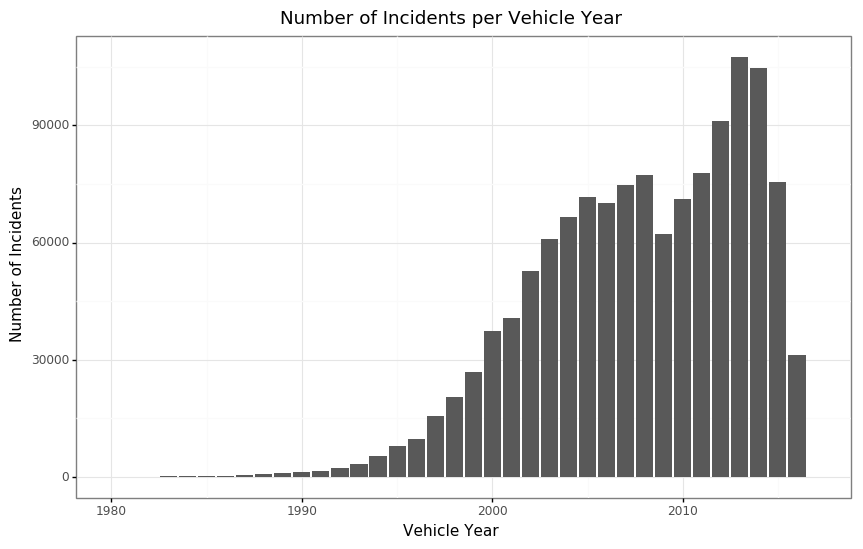

<ggplot: (172738513286)>

In [33]:
import plotnine as p9
from mizani.breaks import date_breaks
from mizani.formatters import date_format

p9.options.figure_size = (6.4, 4.8)
(p9.ggplot(data=vehicle_incidents, mapping=p9.aes(x='Vehicle Year'))
    + p9.geom_bar() + p9.scales.xlim(1980, 2017) + p9.theme_bw() + p9.labels.ylab('Number of Incidents') 
     + p9.labels.ggtitle('Number of Incidents per Vehicle Year')
     + p9.theme(figure_size=(10, 6), axis_text_x = p9.element_text(angle=0)))

### Answer #1: As shown above, the top 3 model years involved in the most incidents are: <a id="answer1"></a>

In [21]:
#I wanted to implement my Python variables in Markdown text so this code cell can be ignored - please view output instead.

from IPython.display import Markdown
Markdown("""
#### 1. 2013: {count_2013} incidents
#### 2. 2014: {count_2014} incidents
#### 3. 2008: {count_2008} incidents
#### Total incident count: {total_count}
""".format(count_2013=vehicle_incidents['Vehicle Year'].value_counts()[2013], 
            count_2014=vehicle_incidents['Vehicle Year'].value_counts()[2014],
            count_2008=vehicle_incidents['Vehicle Year'].value_counts()[2008],
            total_count=vehicle_incidents.shape[0]))


#### 1. 2013: 107481 incidents
#### 2. 2014: 104574 incidents
#### 3. 2008: 77288 incidents
#### Total incident count: 1274669


***

### Question #2: Is there a particular make that has more incidents than others? <a id="question2"></a>

C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


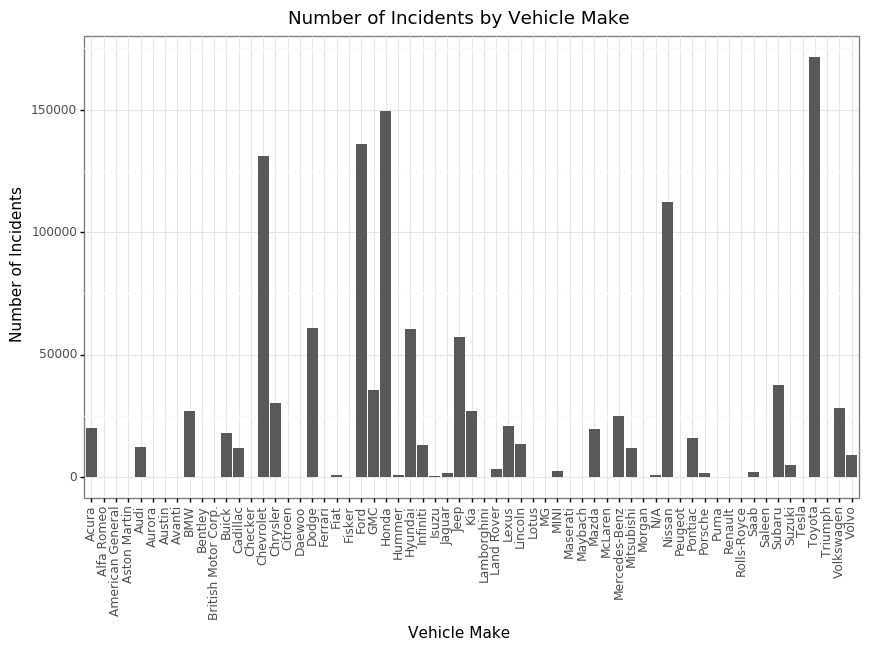

<ggplot: (-9223371864116454326)>

In [22]:
(p9.ggplot(data=vehicle_incidents, mapping=p9.aes(x='Vehicle Make'))
    + p9.geom_bar() + p9.theme_bw() + p9.labels.ylab('Number of Incidents') + p9.labels.ggtitle('Number of Incidents by Vehicle Make') 
     + p9.theme(figure_size=(10, 6), axis_text_x = p9.element_text(angle=90)))

#### While seeing every make is interesting, let's get rid of some of the smaller values or one-offs for clarity (for example, the "Puma" only has one occurrence, rightfully so as it is a rare car these days.) 

#### We'll use 10 as the minimum.

C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


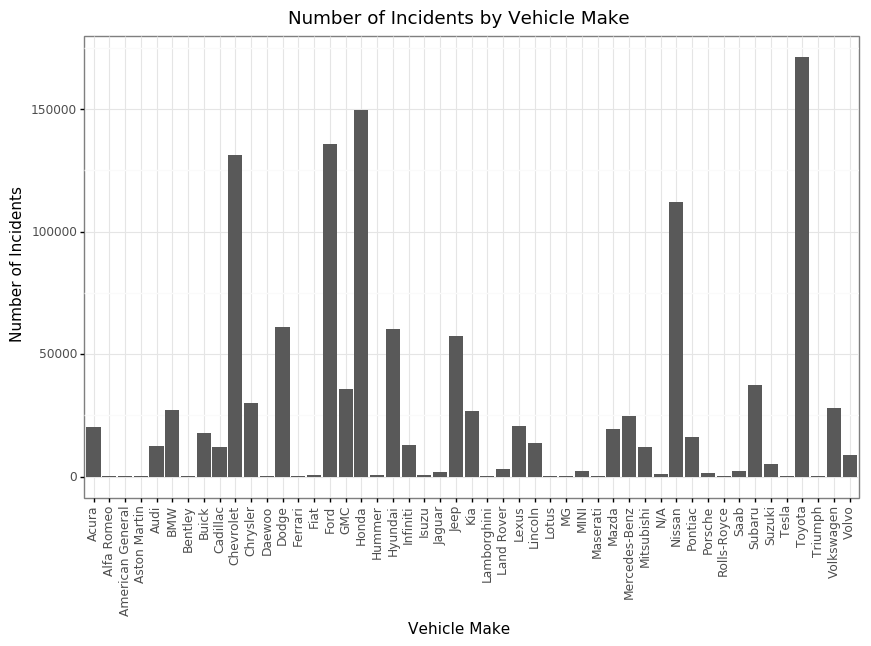

<ggplot: (-9223371864116080545)>

In [23]:
vehicle_incidents_10plus = vehicle_incidents.groupby('Vehicle Make').filter(lambda x : len(x)>10)
(p9.ggplot(data=vehicle_incidents_10plus, mapping=p9.aes(x='Vehicle Make'))
    + p9.geom_bar() + p9.theme_bw() + p9.labels.ylab('Number of Incidents') + p9.labels.ggtitle('Number of Incidents by Vehicle Make') 
     + p9.theme(figure_size=(10, 6), axis_text_x = p9.element_text(angle=90)))

### Answer #2: So, as we can see, the top 5 car makes involved in the most incidents are: <a id="answer2"></a>

In [24]:
#Another Markdown cell with Python variables - please ignore the code and instead look at the output.

from IPython.display import Markdown
Markdown("""
#### 1. Toyota: {toyota_count} incidents
#### 2. Honda: {honda_count} incidents
#### 3. Ford: {ford_count} incidents
#### 4. Chevrolet: {chevrolet_count} incidents
#### 5. Nissan: {nissan_count} incidents
#### Total incident count: {total_count} incidents
""".format(toyota_count=vehicle_incidents['Vehicle Make'].value_counts()['Toyota'], 
            honda_count=vehicle_incidents['Vehicle Make'].value_counts()['Honda'],
            ford_count=vehicle_incidents['Vehicle Make'].value_counts()['Ford'],
            chevrolet_count=vehicle_incidents['Vehicle Make'].value_counts()['Chevrolet'],
            nissan_count=vehicle_incidents['Vehicle Make'].value_counts()['Nissan'],
            total_count=vehicle_incidents.shape[0]))



#### 1. Toyota: 171495 incidents
#### 2. Honda: 149509 incidents
#### 3. Ford: 135958 incidents
#### 4. Chevrolet: 131167 incidents
#### 5. Nissan: 112224 incidents
#### Total incident count: 1274669 incidents


***

### Question #3: Is there a relationship between higher horsepower and contributing factor to incidents? <a id="question3"></a>

In [25]:
hp_group = vehicles.groupby(['Make'])['Horsepower'].mean().reset_index()
hp_group.columns=['Make', 'Average Horsepower']
hp_group

,Make,Average Horsepower
0,AMG,525.900000
1,Acura,262.848485
2,Aston Martin,470.000000
3,Audi,300.183908
4,BMW,347.180451
5,BMW Motorrad,233.620690
6,Bentley,577.444444
7,Buick,249.887324
8,Cadillac,340.980000
9,Chevrolet,294.808307


#### Now let's add the 'Average Horsepower' figures to the 'vehicles_incidents' data so we can correlate horsepower with incidents.

In [26]:
vehicle_incidents['Avg. Make Horsepower'] = vehicle_incidents['Vehicle Make'].map(hp_group.set_index('Make')['Average Horsepower'])
vehicle_incidents

C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,Vehicle Body Type,Registration Class,Action Prior to Accident,Vehicle Year,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Avg. Make Horsepower
0,2016,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,2012.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,160.967742
1,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,2014.0,6.0,Chevrolet,ENVMT,Pavement Slippery,HUMAN,Not Applicable,294.808307
2,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2007.0,4.0,Honda,ENVMT,Pavement Slippery,HUMAN,Not Applicable,188.225000
3,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2011.0,4.0,Chevrolet,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,294.808307
4,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2004.0,6.0,Buick,ENVMT,Pavement Slippery,HUMAN,Not Applicable,249.887324
5,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Parked,2014.0,4.0,BMW,HUMAN,Not Applicable,HUMAN,Not Applicable,347.180451
6,2016,SUBURBAN,PASSENGER OR SUBURBAN,Entering Parked Position,2001.0,4.0,Honda,HUMAN,Driver Inattention/Distraction*,HUMAN,Not Applicable,188.225000
7,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Slowing or Stopping,2006.0,6.0,Hyundai,HUMAN,Not Applicable,HUMAN,Not Applicable,207.303191
8,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Slowing or Stopping,2008.0,8.0,Toyota,HUMAN,Unsafe Speed,HUMAN,Traffic Control Device Disregarded,253.449231
9,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2004.0,6.0,Pontiac,HUMAN,Not Applicable,HUMAN,Not Applicable,NaN


#### And let's designate "high horsepower" cars as 400 HP and up while removing any contributing factors that aren't informative:

C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


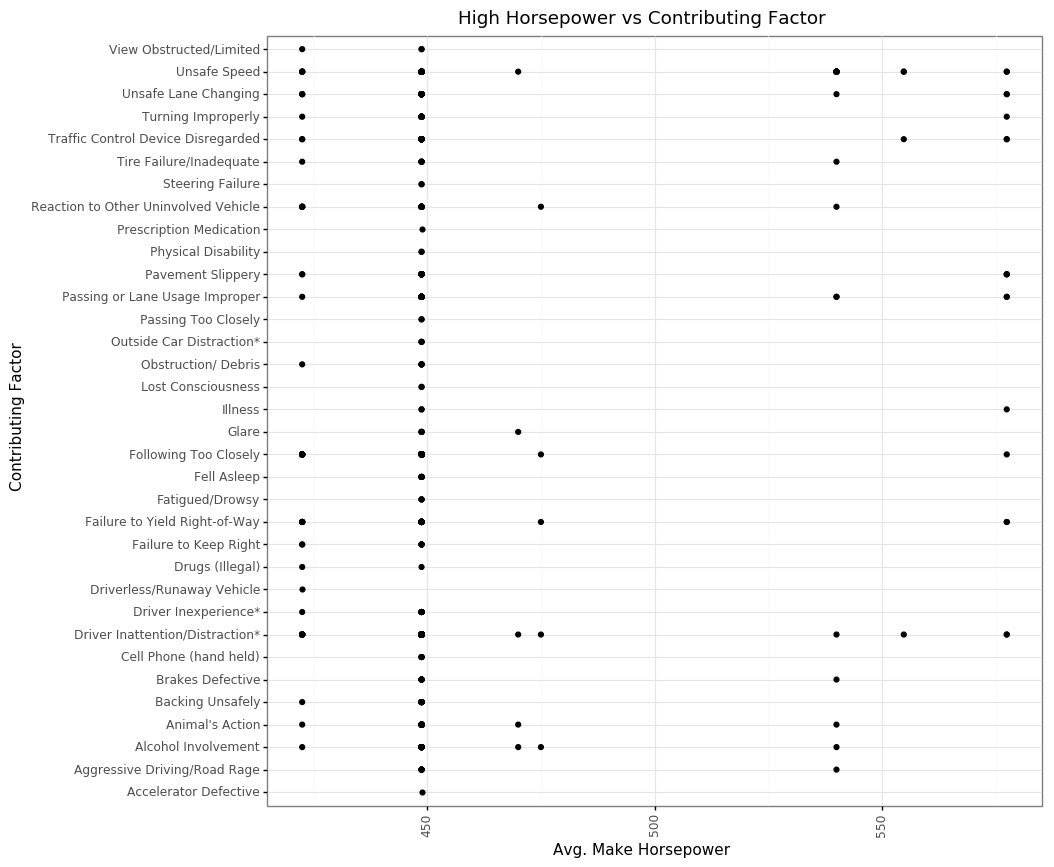

<ggplot: (-9223371864116458766)>

In [27]:
vehicle_incidents_high_hp = vehicle_incidents[vehicle_incidents['Avg. Make Horsepower'] > 399]
vehicle_incidents_high_hp = vehicle_incidents_high_hp[~vehicle_incidents_high_hp['Contributing Factor 1 Description'].isin(['Unknown',
    'Other*',
    'Other',
    'Not Entered',
    'Not Applicable'])]

p9.options.figure_size = (6.4, 4.8)
(p9.ggplot(data=vehicle_incidents_high_hp, mapping=p9.aes(x='Avg. Make Horsepower', y='Contributing Factor 1 Description'))
    + p9.geom_point() + p9.theme_bw() + p9.labels.ylab('Contributing Factor') 
     + p9.labels.ggtitle('High Horsepower vs Contributing Factor')
        + p9.theme(figure_size=(10, 10), axis_text_x = p9.element_text(angle=90)))

### Answer #3: So, as we can see, the top 3 contributing factors for high horsepower cars are: <a id="answer3"></a>
#### 1. Driver Inattention/Distraction*
#### 2. Unsafe Speed
#### 3. Alcohol Involvement

#### Bonus: 4th place was a tie between 6 contributing factors:
#### - Unsafe Lane Changing
#### - Passing or Lane Usage Improper
#### - Traffic Control Device Disregarded
#### -  Reaction To Other Uninvolved Vehicle
#### - Following Too Closely
#### - Failure To Yield
#### - Animal's Action

***

### Question #4: Do certain countries tend to produce vehicles with more horsepower? <a id="question4"></a>

C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


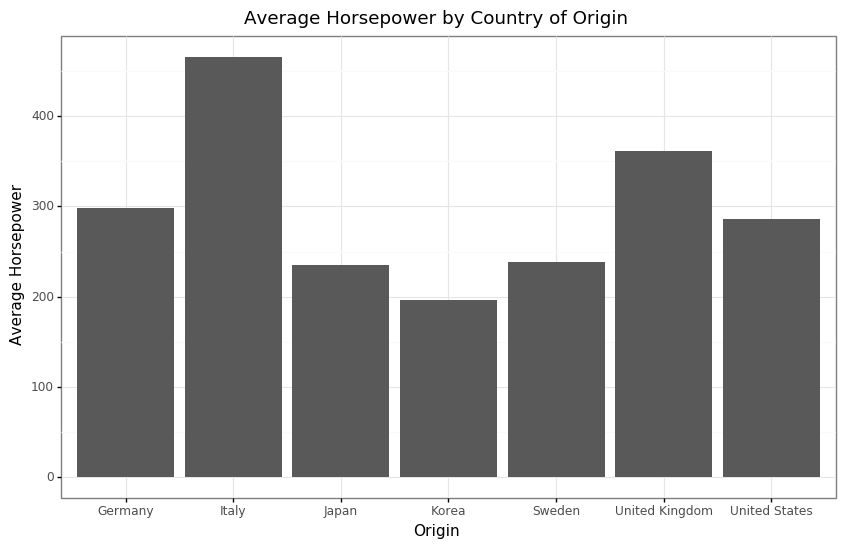

<ggplot: (172738636257)>

In [28]:
hp_group_byCountry = vehicles.groupby(['Origin'])['Horsepower'].mean().reset_index()
hp_group_byCountry.rename(columns = {'Horsepower':'Average Horsepower'}, inplace=True)

(p9.ggplot(data=hp_group_byCountry, mapping=p9.aes(x='Origin', y='Average Horsepower'))
    + p9.geom_bar(stat='identity') + p9.theme_bw() + p9.labels.ggtitle('Average Horsepower by Country of Origin')
    + p9.theme(figure_size=(10, 6), axis_text_x = p9.element_text(angle=0)))

### Answer #4: As we can see, the 3 countries producing the highest average horsepower cars are: <a id="answer4"></a>
#### 1. Italy (incl. Lamborghini, Ferrari, and Maserati)
#### 2. United Kingdom (incl. Bentley, Rolls-RIyce, Aston Martin, Land Rover, MINI, Jaguar, and Lotus)
#### 3. Germany (incl. Audi, BMW, Volkswagen, Mercedes-Benz/AMG/Maybach, and Porsche) 

#### Bonus: Here are all the countries' average horsepower values:

In [29]:
hp_group_byCountry

,Origin,Average Horsepower
0,Germany,298.487455
1,Italy,465.777778
2,Japan,235.517266
3,Korea,195.783282
4,Sweden,238.246914
5,United Kingdom,361.905830
6,United States,286.514155


***

### Question #5: How does country of origin impact vehicles' involvement in traffic incidents? <a id="question5"></a>

#### Now let's add the 'Origin' data to the 'vehicles_incidents' data so we can correlate country of origin with incidents.

In [30]:
makes_origins_group = vehicles[['Make', 'Origin']].copy()
makes_origins_group.drop_duplicates(keep='first', inplace=True)
makes_origins_group.rename(columns = {'Make':'Vehicle Make'}, inplace=True)

vehicle_incidents['Origin'] = vehicle_incidents['Vehicle Make'].map(makes_origins_group.set_index('Vehicle Make')['Origin'])
vehicle_incidents

C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Year,Vehicle Body Type,Registration Class,Action Prior to Accident,Vehicle Year,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Avg. Make Horsepower,Origin
0,2016,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,2012.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,160.967742,United Kingdom
1,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,2014.0,6.0,Chevrolet,ENVMT,Pavement Slippery,HUMAN,Not Applicable,294.808307,United States
2,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2007.0,4.0,Honda,ENVMT,Pavement Slippery,HUMAN,Not Applicable,188.225000,Japan
3,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2011.0,4.0,Chevrolet,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,294.808307,United States
4,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2004.0,6.0,Buick,ENVMT,Pavement Slippery,HUMAN,Not Applicable,249.887324,United States
5,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Parked,2014.0,4.0,BMW,HUMAN,Not Applicable,HUMAN,Not Applicable,347.180451,Germany
6,2016,SUBURBAN,PASSENGER OR SUBURBAN,Entering Parked Position,2001.0,4.0,Honda,HUMAN,Driver Inattention/Distraction*,HUMAN,Not Applicable,188.225000,Japan
7,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Slowing or Stopping,2006.0,6.0,Hyundai,HUMAN,Not Applicable,HUMAN,Not Applicable,207.303191,Korea
8,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Slowing or Stopping,2008.0,8.0,Toyota,HUMAN,Unsafe Speed,HUMAN,Traffic Control Device Disregarded,253.449231,Japan
9,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,2004.0,6.0,Pontiac,HUMAN,Not Applicable,HUMAN,Not Applicable,NaN,NaN


C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\nomaa\Dev\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


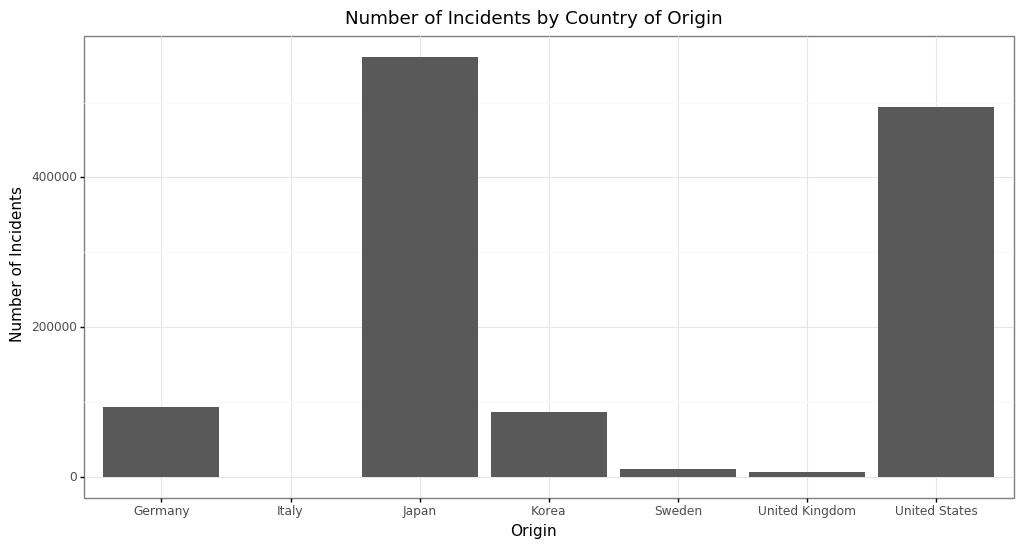

<ggplot: (-9223371864116456146)>

In [31]:
#Eliminate null values from Origins
vehicle_incidents_notNull = vehicle_incidents[vehicle_incidents['Origin'].isin(['Germany',
    'Italy',
    'Japan',
    'Korea',
    'Sweden',
    'United Kingdom',
    'United States'])]

(p9.ggplot(data=vehicle_incidents_notNull, mapping=p9.aes(x='Origin'))
    + p9.geom_bar()+ p9.theme_bw() + p9.labels.ylab('Number of Incidents') 
     + p9.labels.ggtitle('Number of Incidents by Country of Origin')
     + p9.theme(figure_size=(12, 6), axis_text_x = p9.element_text(angle=0)))

### Answer #5: So, as we can see, the top 3 vehicle countries of origin involved in the most incidents are: <a id="answer5"></a>

In [32]:
#Another Markdown cell with Python variables - please ignore the code and instead look at the output

from IPython.display import Markdown
Markdown("""
#### 1. Japan: {japan_count} incidents
#### 2. United States: {us_count} incidents
#### 3. Germany: {germany_count} incidents
#### Total incident count: {total_count} incidents

#### Bonus: Since there are only 4 more countries, why not list their counts:
#### 4. Korea: {korea_count} incidents
#### 5. Sweden: {sweden_count} incidents
#### 6. United Kingdom: {uk_count} incidents
#### 7. Italy: {italy_count} incidents
""".format(japan_count=vehicle_incidents['Origin'].value_counts()['Japan'], 
            us_count=vehicle_incidents['Origin'].value_counts()['United States'],
            germany_count=vehicle_incidents['Origin'].value_counts()['Germany'],
            korea_count=vehicle_incidents['Origin'].value_counts()['Korea'],
            sweden_count=vehicle_incidents['Origin'].value_counts()['Sweden'],
            uk_count=vehicle_incidents['Origin'].value_counts()['United Kingdom'],
            italy_count=vehicle_incidents['Origin'].value_counts()['Italy'],
            total_count=vehicle_incidents.shape[0]))



#### 1. Japan: 560831 incidents
#### 2. United States: 494596 incidents
#### 3. Germany: 94001 incidents
#### Total incident count: 1274669 incidents

#### Bonus: Since there are only 4 more countries, why not list their counts:
#### 4. Korea: 87202 incidents
#### 5. Sweden: 11012 incidents
#### 6. United Kingdom: 7330 incidents
#### 7. Italy: 257 incidents


# THE END <a id="end"></a>